<a href="https://colab.research.google.com/github/Aman8883/Stock-Price-Prediction/blob/main/CAPM_using_nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd

### The dataset for 5 Indian stocks with Nifty as Base

In [5]:
df = pd.read_csv("CAPM_data.csv")
df

,Date,Nifty,TCS.BO,INFY.BO,RELIANCE.BO,HDFCBANK.BO,ICICIBANK.BO
0,2022-01-03,17625.699219,3696.119385,1871.987915,2388.692627,1502.473999,753.986755
1,2022-01-04,17805.250000,3758.606201,1871.099854,2441.744629,1511.075439,762.022095
2,2022-01-05,17925.250000,3737.648193,1820.480225,2449.990723,1546.914551,776.515198
3,2022-01-06,17745.900391,3685.180664,1794.084961,2400.862793,1522.445068,774.001099
4,2022-01-07,17812.699219,3731.646484,1789.102051,2420.086670,1532.826050,782.184204
...,...,...,...,...,...,...,...
243,2022-12-26,18014.599609,3151.791016,1482.325439,2515.613281,1609.694702,885.118835
244,2022-12-27,18132.300781,3154.888672,1495.399780,2536.091064,1612.166382,893.301514
245,2022-12-28,18122.500000,3152.226562,1490.811401,2535.492920,1610.979858,891.367432
246,2022-12-29,18191.000000,3164.762695,1497.373291,2533.599854,1622.300171,899.302185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          248 non-null    object 
 1   Nifty         248 non-null    float64
 2   TCS.BO        246 non-null    float64
 3   INFY.BO       246 non-null    float64
 4   RELIANCE.BO   246 non-null    float64
 5   HDFCBANK.BO   246 non-null    float64
 6   ICICIBANK.BO  246 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


Average and Maximum Price

In [13]:
df.median()

<ipython-input-13-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Nifty           17329.575195
TCS.BO           3245.569702
INFY.BO          1523.743774
RELIANCE.BO      2526.911499
HDFCBANK.BO      1445.625793
ICICIBANK.BO      789.948456
dtype: float64

In [10]:
df.max()

Date             2022-12-30
Nifty               18812.5
TCS.BO          3890.647217
INFY.BO         1913.628174
RELIANCE.BO     2800.841064
HDFCBANK.BO     1642.765503
ICICIBANK.BO     945.621155
dtype: object

In [18]:
df.describe()

,Nifty,TCS.BO,INFY.BO,RELIANCE.BO,HDFCBANK.BO,ICICIBANK.BO
count,248.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,17245.430463,3286.848142,1571.336180,2514.838864,1445.009860,798.381489
std,835.009823,244.677828,146.978629,118.767469,94.266743,83.910053
min,15293.500000,2887.467773,1347.142578,2222.134277,1266.628052,643.168701
25%,16622.487305,3109.052124,1465.230347,2406.637329,1365.000183,725.210083
50%,17329.575195,3245.569702,1523.743774,2526.911499,1445.625793,789.948456
75%,17818.500000,3478.370972,1693.363831,2599.523193,1501.250519,880.841507
max,18812.500000,3890.647217,1913.628174,2800.841064,1642.765503,945.621155


In [57]:
df1=pd.DataFrame()

### We have used pct_change() to calculate the daily return rate

In [62]:
df1["Nifty Returns"]=df["Nifty"].pct_change()* 100
df1["TCS returns"]= df["TCS.BO"].pct_change() * 100
df1["Infosys returns"]= df["INFY.BO"].pct_change() * 100
df1["Reliance returns"]= df["RELIANCE.BO"].pct_change() * 100
df1["HDFC Bank returns"] = df["HDFCBANK.BO"].pct_change()*100
df1["ICICI bank returns"] = df["ICICIBANK.BO"].pct_change()*100
df1

,Nifty Returns,TCS returns,Infosys returns,Reliance returns,HDFC Bank returns,ICICI bank returns
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.018687,1.690606,-0.047439,2.220964,0.572485,1.065714
2,0.673959,-0.557601,-2.705341,0.337713,2.371762,1.901927
3,-1.000542,-1.403758,-1.449907,-2.005229,-1.581825,-0.323767
4,0.376418,1.260883,-0.277741,0.800707,0.681862,1.057247
...,...,...,...,...,...,...
243,1.166963,0.884638,0.313840,0.917428,1.909055,1.501363
244,0.653365,0.098282,0.882016,0.814027,0.153550,0.924472
245,-0.054052,-0.084380,-0.306833,-0.023585,-0.073598,-0.216509
246,0.377983,0.397691,0.440156,-0.074663,0.702697,0.890178


In [65]:
df1=df1.drop(0)

KeyError: ignored

In [64]:
df1

,Nifty Returns,TCS returns,Infosys returns,Reliance returns,HDFC Bank returns,ICICI bank returns
1,1.018687,1.690606,-0.047439,2.220964,0.572485,1.065714
2,0.673959,-0.557601,-2.705341,0.337713,2.371762,1.901927
3,-1.000542,-1.403758,-1.449907,-2.005229,-1.581825,-0.323767
4,0.376418,1.260883,-0.277741,0.800707,0.681862,1.057247
5,1.070032,0.635565,2.093035,0.069779,0.545015,2.161720
...,...,...,...,...,...,...
243,1.166963,0.884638,0.313840,0.917428,1.909055,1.501363
244,0.653365,0.098282,0.882016,0.814027,0.153550,0.924472
245,-0.054052,-0.084380,-0.306833,-0.023585,-0.073598,-0.216509
246,0.377983,0.397691,0.440156,-0.074663,0.702697,0.890178


In [94]:
df1["Reliance returns"].median()

0.014469384812532127

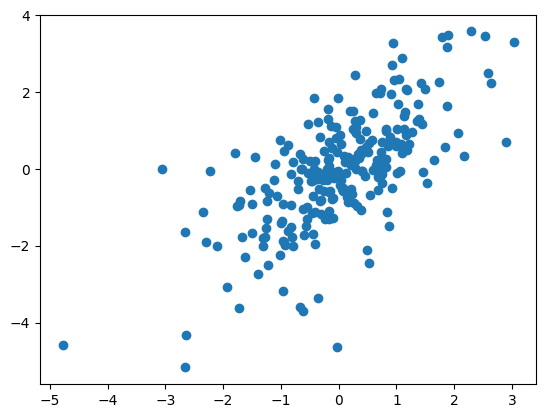

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df1["Nifty Returns"],df1["TCS returns"])

In [26]:
import numpy as np

In [66]:
tcs_beta,tcs_alpha=np.polyfit(df1["Nifty Returns"],df1["TCS returns"],deg=1)

In [67]:
print("Beta for TCS is:",tcs_beta)

Beta for TCS is: 0.9218788222981519


### Beta > 1 means it is more volatile then the market
### Beta <1 means it is less volatile then the market
### Beta == 1 means it strongly correlates to the market


In [68]:
print("Alpha for TCS is:",tcs_alpha)

Alpha for TCS is: -0.06869478941574243


In [70]:
infy_beta,infy_alpha=np.polyfit(df1["Nifty Returns"],df1["Infosys returns"],deg=1)

In [72]:
print("Beta for Infosys:",infy_beta,"\nAlpha for Infosys:",infy_alpha)

Beta for Infosys: 1.056596485001956 
Alpha for Infosys: -0.09550245446411339


In [90]:
rel_beta,rel_alpha=np.polyfit(df1["Nifty Returns"],df1["Reliance returns"],deg=1)

In [91]:
print("Beta for Reliance:",rel_beta)

Beta for Reliance: 1.019891412184926


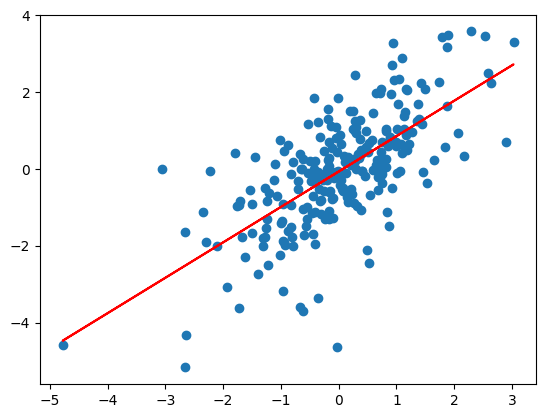

In [75]:
plt.scatter(df1["Nifty Returns"],df1["TCS returns"])
plt.plot(df1['Nifty Returns'], tcs_beta * df1["Nifty Returns"] + tcs_alpha, '-', color = 'r')

In [76]:
tcs_beta

0.9218788222981519

In [85]:
rm= df1["Nifty Returns"].mean() * 252
rm

4.231996144691336

### The 10-year bond yield for India is 7.24 percent
(https://www.bloomberg.com/markets/rates-bonds)


In [95]:
rf = 7.24

#### The CAPM model is as follows:
rf = risk free return
beta =volatility of the stock
rm = average returns of nifty

### r(Stock) = rf + b(rm-rf)


In [96]:
er_tcs = rf + tcs_beta*(rm-rf)

In [97]:
er_tcs

4.466984948399748

### We can expect 4.46% risk free returns from TCS

In [98]:
er_infy = rf + infy_beta*(rm-rf)

In [99]:
er_infy

4.061753699608533